In [71]:
import torch
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data", 
    train=False,
    download=True,
    transform=ToTensor()
)

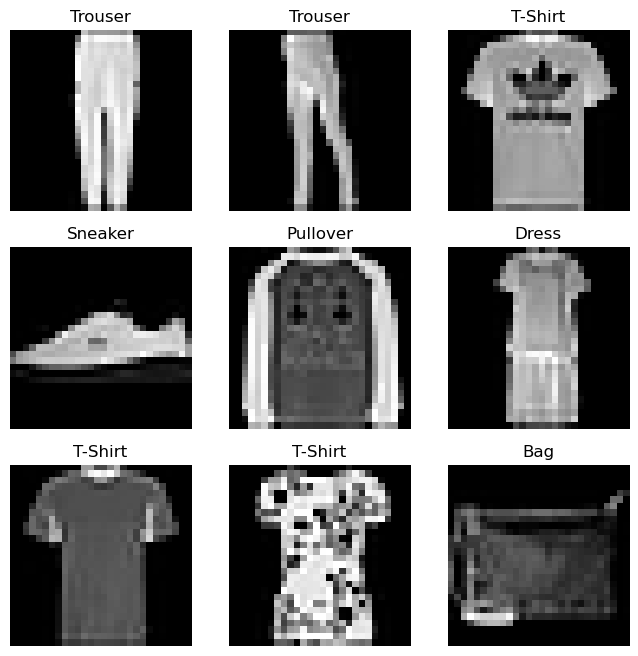

In [24]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [80]:

class MyDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
    #    self.data.sort_values('one', inplace=True)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # if torch.is_tensor(idx):
        #     idx = idx.tolist()
        assert isinstance(idx, int)
        row = self.data.iloc[idx]
        return row[1:].to_list(), row[0]

mydataset = MyDataset('small.csv') 
data, label = mydataset.__getitem__(0)
print(f"Label: {type(label)}")
print(f"Data: {type(data)}")

Label: <class 'numpy.int64'>
Data: <class 'list'>


In [81]:
dataloader = DataLoader(mydataset, batch_size=4, shuffle=True, num_workers=0)

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched)

dataloader.


0 [[tensor([634, 925, 279, 909]), ('2013-07-01 00:00:00', '2013-06-30 23:59:27', '2013-06-30 23:59:36', '2013-06-30 23:59:47'), ('2013-07-01 00:10:34', '2013-07-01 00:14:52', '2013-07-01 00:04:15', '2013-07-01 00:14:56'), tensor([164, 509, 116, 509]), ('E 47 St & 2 Ave', '9 Ave & W 22 St', 'W 17 St & 8 Ave', '9 Ave & W 22 St'), tensor([40.7532, 40.7455, 40.7418, 40.7455], dtype=torch.float64), tensor([-73.9703, -74.0020, -74.0015, -74.0020], dtype=torch.float64), tensor([504, 462, 494, 462]), ('1 Ave & E 16 St', 'W 22 St & 10 Ave', 'W 26 St & 8 Ave', 'W 22 St & 10 Ave'), tensor([40.7322, 40.7469, 40.7473, 40.7469], dtype=torch.float64), tensor([-73.9817, -74.0045, -73.9972, -74.0045], dtype=torch.float64), tensor([16950, 15250, 19411, 16108]), ('Customer', 'Subscriber', 'Customer', 'Customer'), tensor([1992, 1964, 2001, 1978]), tensor([0, 1, 0, 0])], tensor([99, 96,  0, 97])]
1 [[tensor([161]), ('2013-06-30 23:59:33',), ('2013-07-01 00:02:14',), tensor([443]), ('Bedford Ave & S 9 St',)